# Data Visualization

In [1]:
import os
ham_mails=os.listdir(r'C:\Users\Virat\Desktop\New folder\ML\hamnspam\ham')
print(len(ham_mails))

2551


In [2]:
spam_mails=os.listdir(r'C:\Users\Virat\Desktop\New folder\ML\hamnspam\spam')
print(len(spam_mails))

501


In [3]:
print("Spam Percentage=",(len(spam_mails)/(len(spam_mails)+len(ham_mails)))*100)

Spam Percentage= 16.41546526867628


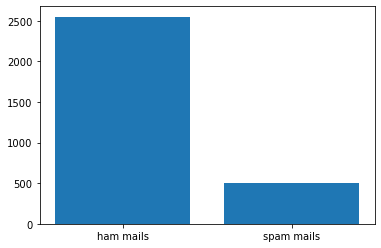

In [4]:
import matplotlib.pyplot as plt
names=['ham mails', 'spam mails']
values=[len(ham_mails), len(spam_mails)]
plt.bar(names, values)
plt.show()

### Importing the Emails

In [5]:
import email
def email_read(path, filename):
    with open(os.path.join(path, filename), 'rb') as e_file:
        email_file = email.parser.BytesParser(policy=email.policy.default).parse(e_file)
    return email_file

In [6]:
import email.policy
email_ham=[email_read(r'C:\Users\Virat\Desktop\New folder\ML\hamnspam\ham', filename) for filename in ham_mails]
email_spam=[email_read(r'C:\Users\Virat\Desktop\New folder\ML\hamnspam\spam', filename) for filename in spam_mails]

In [7]:
print('Ham-Email Content: ',email_ham[20].get_content())

Ham-Email Content:  --- In forteana@y..., "D.McMann" <dmcmann@b...> wrote:
> Robert Moaby, 33, who sent death threats to staff, was also jailed
> for hoarding indecent pictures of children on his home computer.
> =========
> 
> Hmm, if I didn't trust our government and secret police, I could 
look at
> this another way....

There is a bit of circumstantial evidence - apparently some MT 
listers were approached by him (via email) - a little research in 
dejanews/google groups showed a number of messages from him, clearly 
hoping to contact girls, appearing in "alt.teens" and similar groups -
 I just tried a Google Groups search on "Robert Moaby" and some of 
them came top of the list.

Note for Marie - "MT" stands for Mark Thomas, a slightly slimmer, UK 
version of your Michael Moore - the mailing list is named after him. 

Rob


------------------------ Yahoo! Groups Sponsor ---------------------~-->
4 DVDs Free +s&p Join Now
http://us.click.yahoo.com/pt6YBB/NXiEAA/mG3HAA/7gSolB/TM
---

In [8]:
print('Spam-Email Content: ',email_spam[5].get_content())

Spam-Email Content:  I thought you might like these:
1) Slim Down - Guaranteed to lose 10-12 lbs in 30 days
http://www.freeyankee.com/cgi/fy2/to.cgi?l=822slim1

2) Fight The Risk of Cancer! 
http://www.freeyankee.com/cgi/fy2/to.cgi?l=822nic1 

3) Get the Child Support You Deserve - Free Legal Advice 
http://www.freeyankee.com/cgi/fy2/to.cgi?l=822ppl1

Offer Manager
Daily-Deals








If you wish to leave this list please use the link below.
http://www.qves.com/trim/?social@linux.ie%7C29%7C134077


-- 
Irish Linux Users' Group Social Events: social@linux.ie
http://www.linux.ie/mailman/listinfo/social for (un)subscription information.
List maintainer: listmaster@linux.ie




### E-Mail types

In [9]:
ham_type=[]
spam_type=[]
for i in range(len(email_ham)):
    ham_type.append(email_ham[i].get_content_type())
for i in range(len(email_spam)):
    spam_type.append(email_spam[i].get_content_type())

print('Ham-Email types: ', set(ham_type))
print('Spam-Email types: ',set(spam_type))

Ham-Email types:  {'text/plain', 'multipart/report', 'multipart/mixed', 'multipart/related', 'multipart/alternative', 'multipart/signed'}
Spam-Email types:  {'text/plain', 'multipart/mixed', 'text/html', 'multipart/related', 'multipart/alternative'}


### E-Mail Preproccessing

In [10]:
import re

ham=[]
spam=[]

def modified_email(mail):
    remove=re.compile('<.*?>')
    modified=re.sub(remove,'',mail)
    modified=modified.replace('\n',' ')
    mod_ham=re.sub(r"[^a-zA-Z0-9]+", ' ', modified)
    return mod_ham

for mail in email_ham:
    try:
        if mail.get_content_type()=='text/plain' or mail.get_content_type()=='text/html':
            content=mail.get_content()
            e_mail=modified_email(content)
            ham.append(e_mail.lower())
    
    except LookupError:
        pass
        
for mail in email_spam:
    try:
        if mail.get_content_type()=='text/plain' or mail.get_content_type()=='text/html':
            content=mail.get_content()
            e_mail=modified_email(content)
            spam.append(e_mail.lower())
        
    except LookupError:
        pass

In [11]:
print(ham[5])

 in adding cream to spaghetti carbonara which has the same effect on pasta as making a pizza a deep pie i just had to jump in here as carbonara is one of my favourites to make and ask what the hell are you supposed to use instead of cream i ve never seen a recipe that hasn t used this personally i use low fat creme fraiche because it works quite nicely but the only time i ve seen an supposedly authentic recipe for carbonara it was identical to mine cream eggs and lots of fresh parmesan except for the creme fraiche stew stewart smith scottish microelectronics centre university of edinburgh http www ee ed ac uk sxs yahoo groups sponsor 4 dvds free s p join now http us click yahoo com pt6ybb nxieaa mg3haa 7gsolb tm to unsubscribe from this group send an email to forteana unsubscribe egroups com your use of yahoo groups is subject to http docs yahoo com info terms 


In [12]:
print(spam[60])

kenya do you have too much debt would you like to lower your monthly payments and save money let us help you click here if you would like to be taken off our list click here 2170uzha6 646nlhk0895sdnb0 294bcpgl32 


### ham and spam e-mails after preproccessing

In [13]:
print('Ham-Emails: ',len(ham), '\nSpam-Emails: ',len(spam))

Ham-Emails:  2453 
Spam-Emails:  400


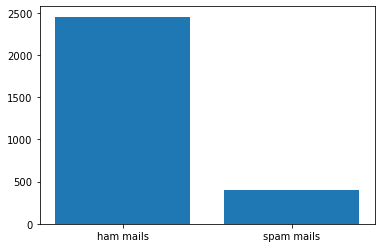

In [14]:
names=['ham mails', 'spam mails']
values=[len(ham), len(spam)]
plt.bar(names, values)
plt.show()

### Arranging the dataset in dataframe

In [15]:
import pandas as pd

ham=pd.DataFrame(ham, columns=['Content'])
ham['Labels']=1

spam=pd.DataFrame(spam, columns=['Content'])
spam['Labels']=0

In [16]:
print('Ham Emails: ',ham.shape)
print('Spam Emails: ', spam.shape)
print(ham.head())
print()
print(spam.head())

Ham Emails:  (2453, 2)
Spam Emails:  (400, 2)
                                             Content  Labels
0   date wed 21 aug 2002 10 54 46 0500 from chris...       1
1  martin a posted tassos papadopoulos the greek ...       1
2  man threatens explosion in moscow thursday aug...       1
3  klez the virus that won t die already the most...       1
4  on wed aug 21 2002 at 15 46 ulises ponce wrote...       1

                                             Content  Labels
0  mv 1 00001 bfc8d64d12b325ff385cca8d07b84288 mv...       0
1   table border 0 cellpadding 0 cellspacing 2 id...       0
2  1 fight the risk of cancer http www adclick ws...       0
3  1 fight the risk of cancer http www adclick ws...       0
4   adult club offers free membership instant acc...       0


### Concatinating both dataframes into one

In [17]:
df=pd.concat([ham, spam], axis=0)
df=df.sample(frac=1)

In [18]:
df.head()

,Content,Labels
2096,url http boingboing net 85506950 date not supp...,1
2266,url http www newsisfree com click 5 8535468 21...,1
1048,gotta wonder what the gpg config stuff in exm...,1
1326,once upon a time jon wrote since libdvdcss 1 2...,1
54,see us for free hi there me and my slutty ama...,0


In [19]:
for i in df['Content']:
    if type(i) != str:
        print(type(i),end = ',')

In [20]:
print(df.shape)

(2853, 2)


### Encoding and Splitting the data

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer #To tokenize the text data
tfidf=TfidfVectorizer()
X=tfidf.fit_transform(df['Content'])
# X=pd.DataFrame(X)
Y=df['Labels']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Training and Testing the data

### 1. Logistic Regression (Accuracy: 94.57092819614711)

In [28]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)*100
print(accuracy)

94.57092819614711


### 2. Random Forest Regressor (Accuracy: 95.6217162872154)

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

def hypertuning():
    rf_regressor = RandomForestRegressor()
    parameters = {
        'max_depth': [3, 5, 8, 10, None],
        'n_estimators': [10, 100, 200, 300, 400, 500],
        'bootstrap': [True, False]
    }
    rf_model = RandomizedSearchCV(rf_regressor, param_distributions=parameters, n_jobs=-1, cv=5)
    rf_model.fit(X_train, y_train)
    print(rf_model.best_params_)
    print(rf_model.best_score_)
    return rf_model

rf_model = hypertuning()
ypred = rf_model.predict(X_test)

{'n_estimators': 100, 'max_depth': 8, 'bootstrap': True}
0.7655495961181134


In [41]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred.round(), y_test)*100
print(accuracy)

95.6217162872154


### 3. Decision Tree Classifier (Accuracy: 96.14711033274956)

In [46]:
from sklearn.tree import DecisionTreeClassifier
d_clf=DecisionTreeClassifier()
d_clf.fit(X_train, y_train)
y_predict=d_clf.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_predict, y_test)*100
print(accuracy)

96.14711033274956


### 4. KNN Classifier (Accuracy: 98.42381786339755)

In [65]:
from sklearn.neighbors import KNeighborsClassifier
KNN_clf=KNeighborsClassifier(n_neighbors =5,weights = 'distance',p = 2)
KNN_clf.fit(X_train, y_train)
yprediction=KNN_clf.predict(X_test)

In [66]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(yprediction, y_test)*100
print(accuracy)

98.42381786339755
